In [0]:
import warnings
warnings.simplefilter("ignore")

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Decision Trees

In [0]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth = 4)

max_depth = profundidad del arbol

In [0]:
from sklearn.model_selection import train_test_split

X = pd.read_csv("X.csv")
y = X['NUM_GRAVEDAD']
X = X.drop(['NUM_GRAVEDAD','X',	'Y'],axis=1)

In [137]:
X.head(5)

,DIA,PERIODO,CBML,DIA_SEMANA,MES,NUM_COMUNA,NUM_DISENO,NUM_CLASE,NUM_BARRIO
0,20.0,2018.0,1507.0,0.0,9.0,0.0,0.0,0.0,0.0
1,21.0,2018.0,715.0,1.0,3.0,1.0,0.0,1.0,1.0
2,30.0,2018.0,717.0,0.0,8.0,1.0,1.0,0.0,2.0
3,10.0,2018.0,1019.0,2.0,9.0,2.0,1.0,0.0,3.0
4,12.0,2018.0,1419.0,3.0,10.0,3.0,0.0,0.0,4.0


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [139]:
model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
import graphviz 

libreria para visualizar grafos

In [0]:
from sklearn.tree import export_graphviz

treedot = export_graphviz(model,
                         out_file =None,
                          feature_names=X.columns
                         )

In [142]:
treedot

'digraph Tree {\nnode [shape=box] ;\n0 [label="NUM_CLASE <= 0.5\\nmse = 0.256\\nsamples = 26604\\nvalue = 0.477"] ;\n1 [label="NUM_DISENO <= 0.5\\nmse = 0.224\\nsamples = 18535\\nvalue = 0.677"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="CBML <= 907.5\\nmse = 0.209\\nsamples = 12002\\nvalue = 0.717"] ;\n1 -> 2 ;\n3 [label="CBML <= 305.5\\nmse = 0.235\\nsamples = 3703\\nvalue = 0.65"] ;\n2 -> 3 ;\n4 [label="mse = 0.228\\nsamples = 410\\nvalue = 0.715"] ;\n3 -> 4 ;\n5 [label="mse = 0.235\\nsamples = 3293\\nvalue = 0.642"] ;\n3 -> 5 ;\n6 [label="CBML <= 1101.5\\nmse = 0.194\\nsamples = 8299\\nvalue = 0.747"] ;\n2 -> 6 ;\n7 [label="mse = 0.17\\nsamples = 3045\\nvalue = 0.793"] ;\n6 -> 7 ;\n8 [label="mse = 0.206\\nsamples = 5254\\nvalue = 0.72"] ;\n6 -> 8 ;\n9 [label="CBML <= 1001.5\\nmse = 0.244\\nsamples = 6533\\nvalue = 0.603"] ;\n1 -> 9 ;\n10 [label="NUM_DISENO <= 2.5\\nmse = 0.256\\nsamples = 2062\\nvalue = 0.499"] ;\n9 -> 10 ;\n11 [label="mse = 0.254\\

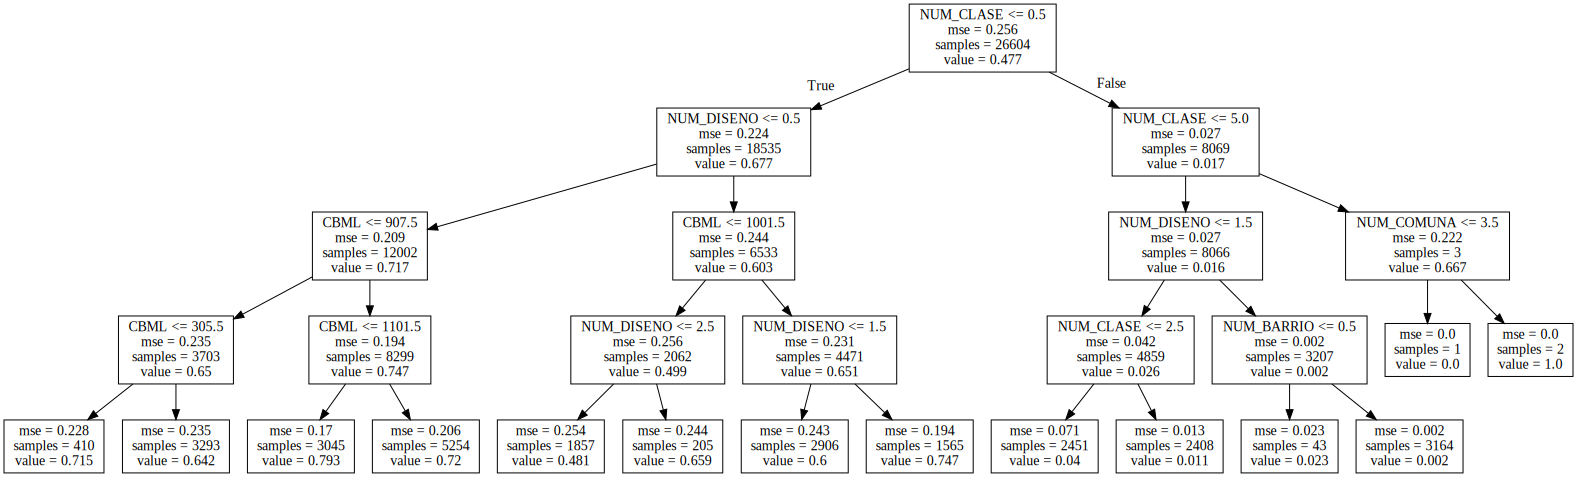

In [143]:
graphviz.Source(treedot)

nuestra mejor variable de predicion fue NUM_CLASE

# Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

forest = RandomForestRegressor()
results = cross_validate(forest,X,y,cv=5,scoring='r2',return_train_score=True)

In [162]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.8775858998614975
0.3135986870412239


Mejor resultado que Lasso! Y ano tenemos Bias y tenemos un mejor score r2. Sin embargo tenemos una diferencia importante entre score de entrenamiento y test(overfit)

# Gradient Boosted Trees

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

ensemble = GradientBoostingRegressor()
results = cross_validate(forest,X,y,cv=5,scoring='r2',return_train_score=True)

In [164]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.8773410618630937
0.31499848122745366


# Optimización de hiperparámetros

Buenas practicas del Gradient Boosted Trees, siguiendo el modelo

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [0]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':range(20,501,20)}

In [167]:
list(param_test1['n_estimators'])

[20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360,
 380,
 400,
 420,
 440,
 460,
 480,
 500]

se hace por que con GridSearch se busca el mejor valor para la cantidad de estimadores 

In [0]:
estimador = GradientBoostingRegressor(learning_rate =0.1,
                                     min_samples_split=500,
                                     min_samples_leaf=50,
                                     max_depth=8,
                                     max_features='sqrt',
                                     subsample=0.8,
                                     random_state=10)

parametros de los arboles

In [0]:
gsearch1 = GridSearchCV(estimador,
                       param_grid = param_test1,
                       scoring='r2',
                       cv=5)

In [170]:
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=8,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
            

In [171]:
list(zip(gsearch1.cv_results_['mean_test_score'], gsearch1.cv_results_['std_test_score'], gsearch1.cv_results_['params'])), gsearch1.best_params_, gsearch1.best_score_

([(0.37789308427732526, 0.008506464926491656, {'n_estimators': 20}),
  (0.3864473879713494, 0.008590631887123352, {'n_estimators': 40}),
  (0.38574504777957125, 0.008760289260897874, {'n_estimators': 60}),
  (0.38500436186316717, 0.009173286274442981, {'n_estimators': 80}),
  (0.38462309923651766, 0.009356626255869324, {'n_estimators': 100}),
  (0.38321819259536927, 0.009266966423080274, {'n_estimators': 120}),
  (0.3818565291358502, 0.00937932969297019, {'n_estimators': 140}),
  (0.38099217317835066, 0.009467027112127486, {'n_estimators': 160}),
  (0.3798260107935321, 0.009451340059165043, {'n_estimators': 180}),
  (0.37871871803108287, 0.009688059433656386, {'n_estimators': 200}),
  (0.3771833337204179, 0.009797724818457714, {'n_estimators': 220}),
  (0.3760620960678917, 0.009970616154116275, {'n_estimators': 240}),
  (0.3748715227246585, 0.010037190386219612, {'n_estimators': 260}),
  (0.37387829311915943, 0.009936782518393831, {'n_estimators': 280}),
  (0.37291527289531806, 0.00980

 mejoramos nuestro performarce 0.4



In [0]:
final_results = cross_validate(gsearch1.best_estimator_,X_train,y_train)

In [173]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.8773410618630937
0.31499848122745366


In [0]:
estimador = GradientBoostingRegressor(learning_rate =0.1,
                                     min_samples_split=500,
                                     min_samples_leaf=50,
                                     max_depth=8,
                                     max_features='sqrt',
                                     subsample=0.8,
                                     random_state=10,
                                     n_estimators=40)

In [196]:
estimador.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=500,
                          min_weight_fraction_leaf=0.0, n_estimators=40,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=10, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [197]:
estimador.score(X_test, y_test)

0.38380893404292427

Conclusion final

en Score r2 gracias al haber trabajado sobre las features y tomar varios modelos y finalmente con gsearch1 al haber optimizado los parametros de nuestro modelo